In [60]:
import numpy
from matplotlib import pyplot 
import time,sys

%matplotlib inline

In [85]:
nx = 81  # number of grid
dx = 2/(nx-1) 
nt = 10  #number of time steps 
dt = 0.025
c = 1 # this is wave speed 

u = numpy.ones(nx, dtype=float)
u[int(0.5/dx): int(1/dx +1)] = 2  # this is the cap function 

# pyplot.plot(numpy.linspace(0,2,nx), u)

We are simulating for convection eqn  - which is used to describe how quantities are transported through medium due to motion (velocity) of the fluid
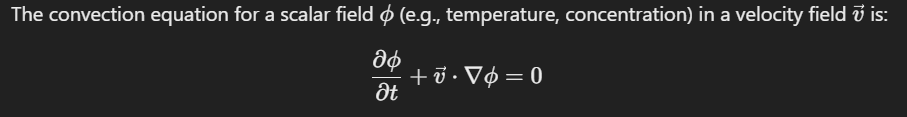

the equation we are solving for is 
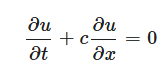
when discritised 
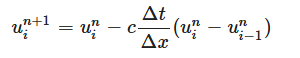


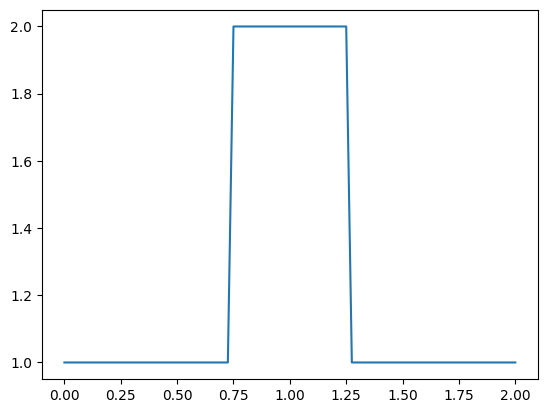

In [86]:
un = numpy.ones(nx)
un = u
#for next time step
for j in range(nt):
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i] - c*dt/dx*(un[i] - un[i-1]) 

pyplot.plot(numpy.linspace(0,2,nx),u)


previously the convection was linear - because velocity was constant - 
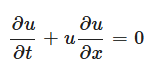 - non-linear convection eqn 

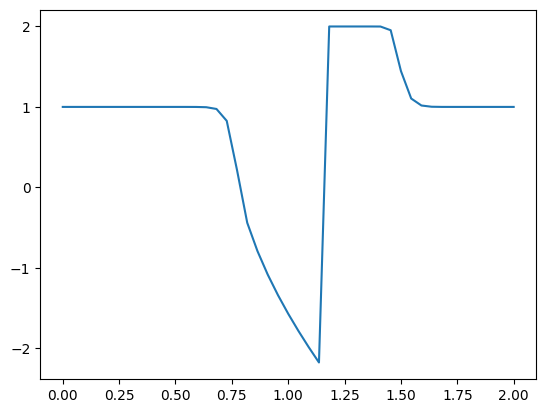

In [79]:
nx = 45  # number of grid
nt = 15  #number of time steps 


dx = 2/(nx-1) 
dt = 0.025

u = numpy.ones(nx, dtype=float)
u[int(0.5/dx): int(1/dx +1)] = 2  # this is the cap function 
un = numpy.ones(nx)

for j in range(nt):
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i] - dt/dx*un[i]*(un[i]-un[i-1])

pyplot.plot(numpy.linspace(0,2,nx),u)

The non-linear convective equation is for viscous flow - called  Invisid Burgers eqn
- This eqn can create discountinous solutions from smooth initial conditions  - similar to shock creation 

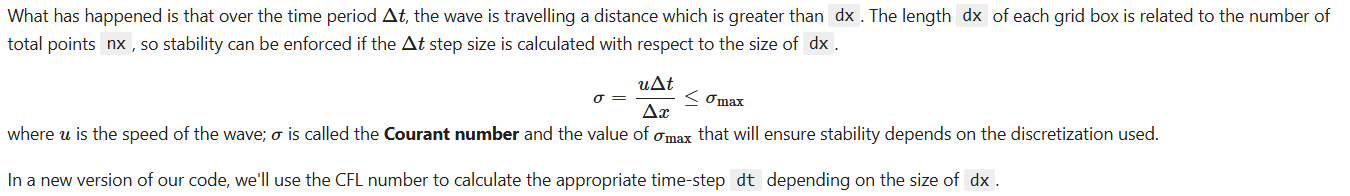

so dt depends on the dx - 

In [109]:
def linear_conv(nx):
    dx = 2/(nx-1)
    nt = 20 
    c = 1
    sigma = 0.65
    dt = sigma*dx

    u = numpy.ones(nx)
    u[int(.5/dx):int(1 / dx + 1)] = 2

    un = numpy.ones(nx)

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    pyplot.plot(numpy.linspace(0, 2, nx), u)

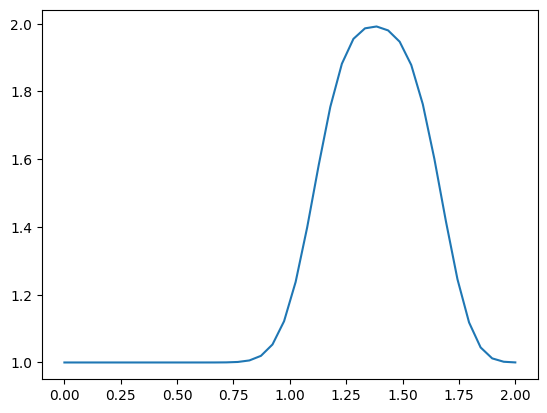

In [110]:
linear_conv(40)

## Diffusion term 

The diffusion equation is a partial differential equation that describes how a quantity, such as heat, mass, or momentum, spreads out in a medium over time due to random motion or molecular interactions. It is a cornerstone of heat transfer, mass transport, and fluid dynamics.

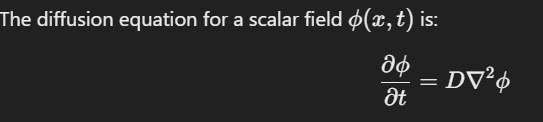  our eqn is 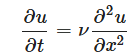

Now to discretise this double derivative - we take taylor series of u_i+1 and u_i-1  then 
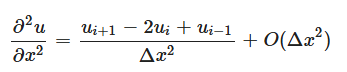  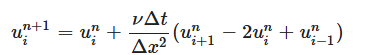

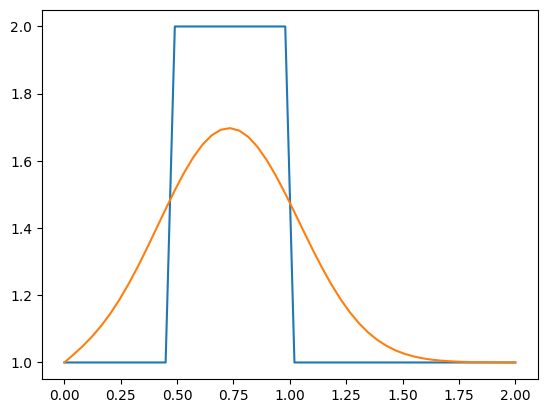

In [131]:

nx = 50
dx = 2 / (nx - 1)
nu = 0.3   #the value of viscosity
sigma = .1 #sigma is a parameter, we'll learn more about it later
dt = sigma * dx**2 / nu #dt is defined using sigma ... more later!
nt = int(0.1/dt) # so that total time is always 5 units


u = numpy.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
pyplot.plot(numpy.linspace(0,2,nx),u)

un = numpy.ones(nx) #our placeholder array, un, to advance the solution in time

for j in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
        u[i] = un[i] + nu*dt/(dx**2)*(un[i+1] - 2*u[i] + u[i-1])

pyplot.plot(numpy.linspace(0,2,nx), u)

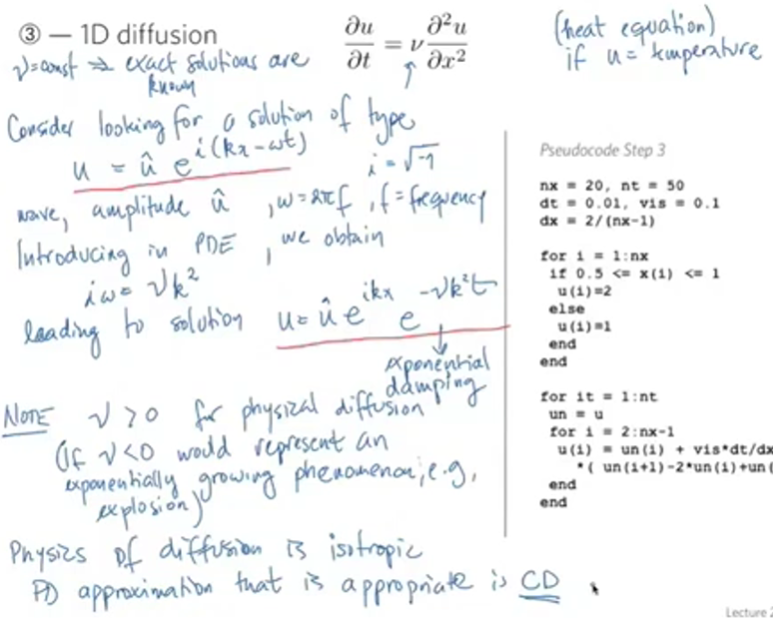

If nu is constant then only exact solutions exist - The exact solution is a wave equation - 
and diffusion will cause exponential damping wrt time

Now combining both convection and diffusion  - Burgers eqn
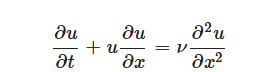

Discretised form 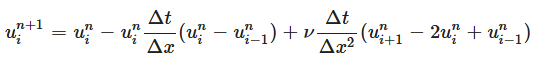

Initial conditions are - choosen because it has a corresponding analytical solution to compare result
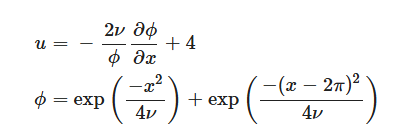

The analytical sol
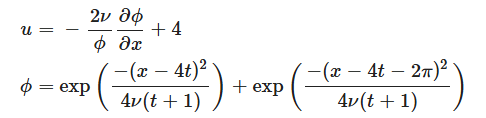

Boundary condition - 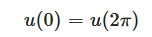


In [141]:
import sympy 
from sympy import init_printing 
init_printing(use_latex = True)
from sympy.utilities.lambdify import lambdify
from matplotlib import pyplot 
%matplotlib inline


In [140]:
x , nu, t = sympy.symbols('x nu t')
phi = sympy.exp(-x**2/(4*nu)) + sympy.exp(-(x-2*numpy.pi)**2/(4*nu))

phi_prime = phi.diff(x)

u =  -2*nu/phi*(phi_prime) + 4
#To lambdify this expression into a useable function, we tell lambdify which variables to request and the function we want to plug them in to.
unfuc = lambdify((t,x,nu),u)

# print(unfuc(1,2*numpy.pi,0.3))

4.000000000000027


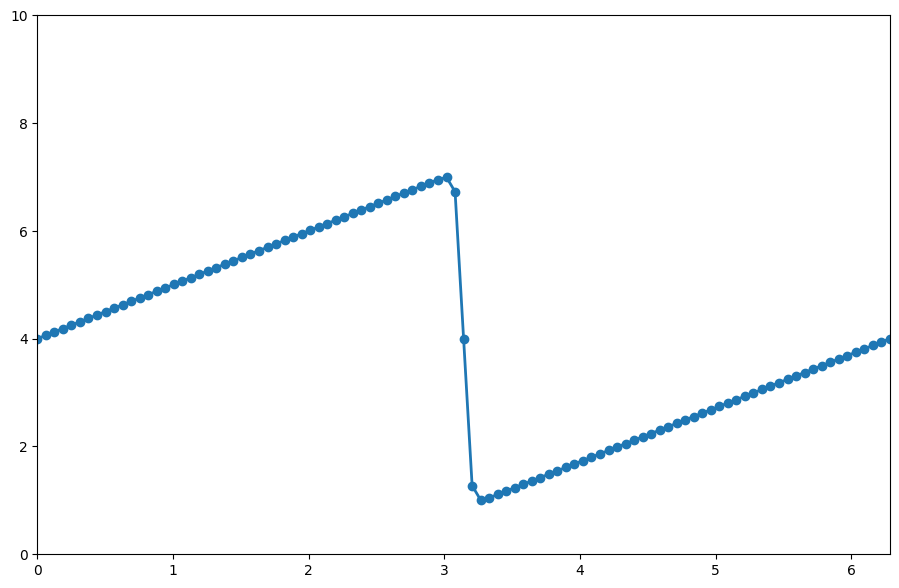

In [143]:
###variable declarations
nx = 101
nt = 100
dx = 2 * numpy.pi / (nx - 1)
nu = .07
dt = dx * nu  ##  why??  -------?????????????----------

x = numpy.linspace(0, 2 * numpy.pi, nx)
un = numpy.empty(nx)
t = 0

u = numpy.asarray([unfuc(t, x0, nu) for x0 in x])

pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x, u, marker='o', lw=2)
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10]);

In [ ]:
# analytical solution

x , nu, t = sympy.symbols('x nu t')
phis = sympy.exp(-(x -4*t)**2/(4*nu*(t+1))) + sympy.exp(-(x-4*t -2*numpy.pi)**2/(4*nu*(t+1)))

phis_prime = phis.diff(x)

us =  -2*nu/phis*(phis_prime) + 4
#To lambdify this expression into a useable function, we tell lambdify which variables to request and the function we want to plug them in to.
usfuc = lambdify((t,x,nu),us)


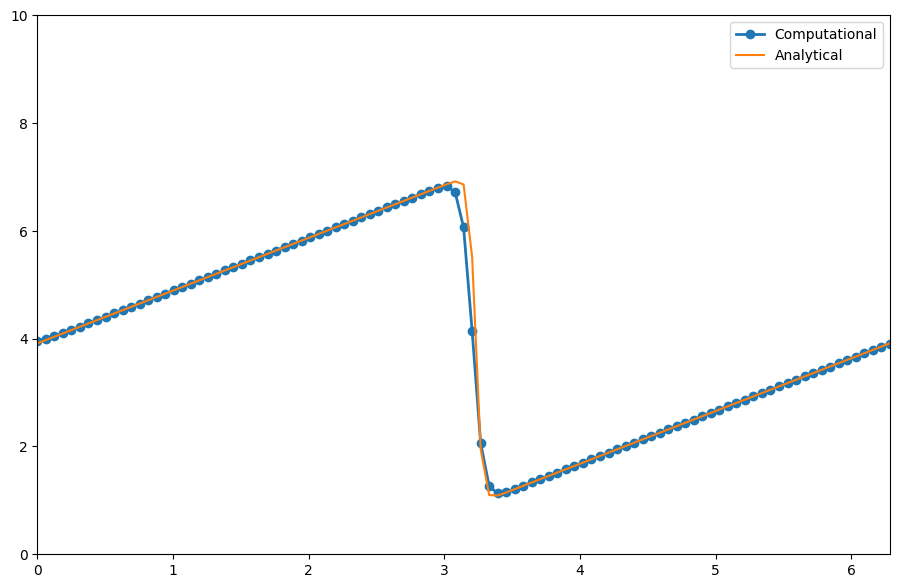

In [156]:
# now we will run the loop according to descretisation 
###variable declarations
nx = 101
nt = 100
dx = 2 * numpy.pi / (nx - 1)
nu = .07
dt = dx*nu*0.05  ##  why??  -------?????????????----------

x = numpy.linspace(0, 2 * numpy.pi, nx)
un = numpy.empty(nx)
t = 0

u = numpy.array([unfuc(t, x0, nu) for x0 in x])

for j in range(nt):
    un = u.copy()
    for i in range(nx):
        if i== nx-1 :
            u[i] = un[i] - un[i]*dt/dx*(un[i] - un[i-1]) + nu*dt/(dx*dx)*(un[0] - 2*un[i] + un[i-1])
        elif i ==0:
            u[i] = un[i] - un[i]*dt/dx*(un[i] - un[nx-1]) + nu*dt/(dx*dx)*(un[i+1] - 2*un[i] + un[nx-1])
        elif i != 0:
            u[i] = un[i] - un[i]*dt/dx*(un[i] - un[i-1]) + nu*dt/(dx*dx)*(un[i+1] - 2*un[i] + un[i-1])


us = numpy.array([usfuc(nt*dt, xi , nu) for xi in x])
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x,u, marker='o', lw=2, label='Computational')
pyplot.plot(x, us, label='Analytical')
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10])
pyplot.legend();


representation of central discretisation 
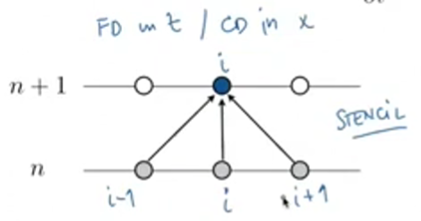



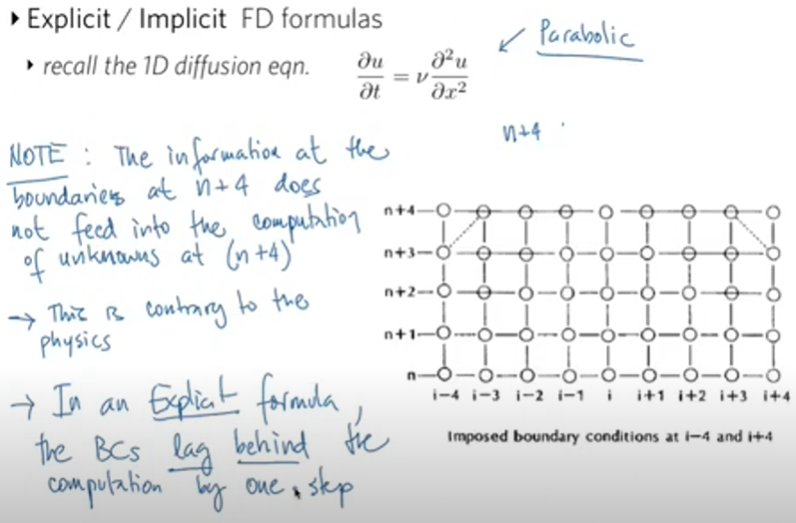

To solve this - if we write eqn in time with backward difference - then there will be 3 variables 
    So to solve this - we need a set of COUPLED FD eqns - for which we need to write fd for all points 

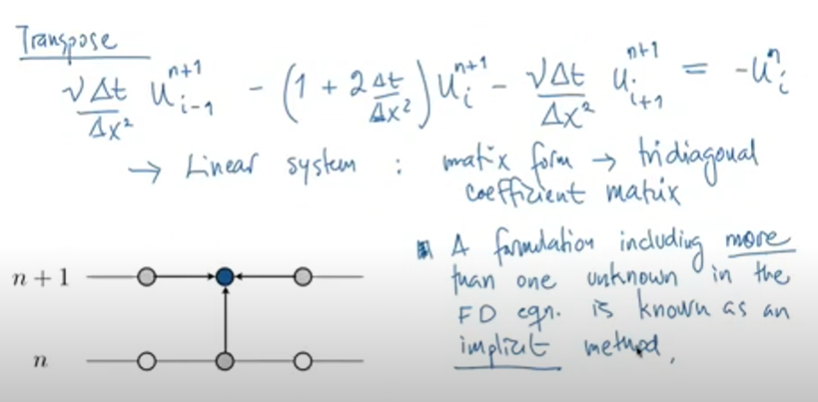

Now this is a implicit formulation - there are various ways to solve this

## Crank - Nicholson method


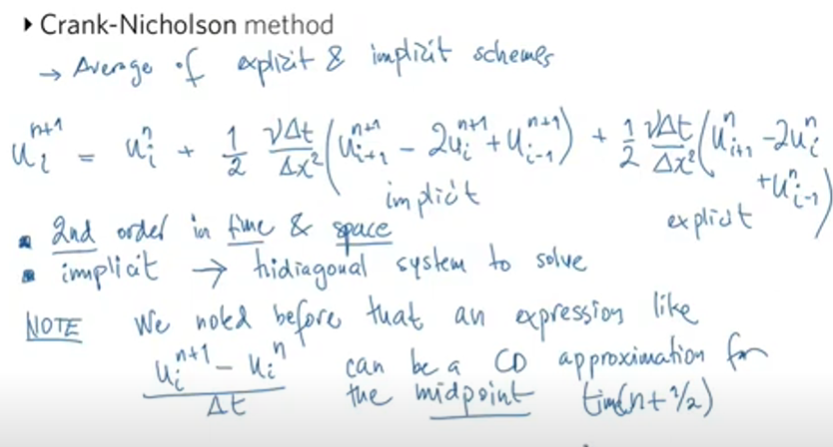  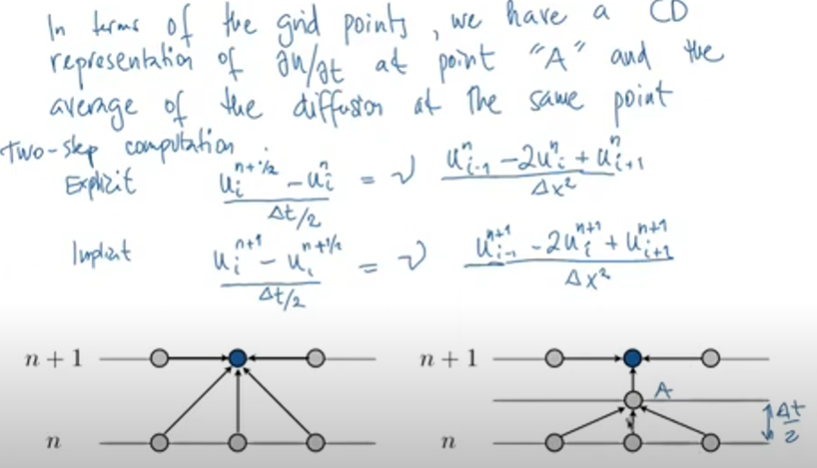